In [1]:
#!pip install ipynb
from ipynb.fs.full.Utilities import *

In [37]:
#Load classifier
clf = joblib.load('modelMarzo.pkl')

In [38]:
dataset = OpenDataset("FullDataset.csv")
print(f"Number of tweets: {len(dataset)}")

Number of tweets: 33602


In [39]:
#Vaxine used

#vaxine = "astrazeneca"
#vaxine = "pfizer"
#vaxine = "moderna"
#vaxine = "sputnik"
#vaxine = "johnson"

File tweetFiltered_labeled (that contains the predicted class for each label) has been created 

Classification result:
dataset len: 9823
class 0 len: 4400
class 1 len: 2682
class 2 len: 2741


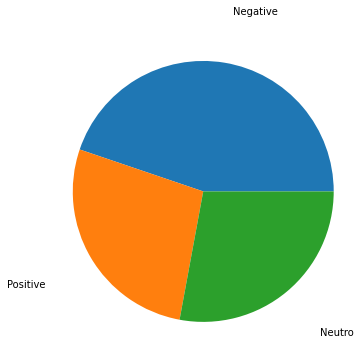

In [41]:
#Search tweets of a specific period and on particural vaxine
doClassification(dataset,clf,vaxine=None,start_date="2021-04-01",end_date="2021-04-28")